In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import constants as c
import statsmodels.api as sm
from sklearn.decomposition import PCA
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

%matplotlib notebook

## 1. Generate plots for predictor variables with largest coefficients in Linear Regression

In [2]:
data = pd.read_excel("../data/NationalBodyProjectTurk.xlsx")

In [3]:
c.cat_demo

['Sex',
 'SexualOrientationX4',
 'EthnicityX5',
 'RelationshipStatus',
 'CollegeStudent']

In [4]:
# Load predictor variables X and outcome variables y
X = data.loc[:, c.num_demo + c.survey_data_aggregate].values
ys = data.loc[:, c.y_variables]

In [5]:
independent_vars = c.num_demo + c.survey_data_aggregate

In [6]:
name_dictionary = {'AETOTAL': 'AETOTAL',
                   'OverweightPreoccupationTotal': 'OPTotal',
                   'OverweightPreoccupation3Diet': 'OPDiet',
                   'OverweightPreoccupation4TriedFasting': 'OPFasting',
                   'BIQLITotal': 'BIQLITotal'}

In [10]:
def run_pca(X, n):
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    pca = PCA(n_components=n)
    pca.fit(X)
    return pca.transform(X), pca

def preprocess_pipeline(X, y):
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    return X, y
    
def regression(y, X_t):
    X_c = sm.add_constant(X_t, prepend=False)
    mod = sm.OLS(y, X_c).fit()
    return mod


def plot_3d(X_sampled, y_sampled, title, xlabel, ylabel, mod, ax, view=None):
    # scatter of data set + trained function hyperplane

    title = name_dictionary[title]
    n = X_sampled.shape[0]

    ax.scatter(X_sampled[:,0], X_sampled[:,1], y_sampled)

    X1_space = np.linspace(np.min(X_sampled[:,0]), np.max(X_sampled[:,0]), n)
    X2_space = np.linspace(np.min(X_sampled[:,1]), np.max(X_sampled[:,1]), n)
    p1_surf, p2_surf = np.meshgrid(X1_space, X2_space)

    result = p1_surf * mod.params[0] + p2_surf * mod.params[1] + mod.params[2]

    ax.plot_surface(p1_surf, p2_surf, result, color='r', alpha=0.5)
    
    #r2 = mod.rsquared
    r2 = mod.rsquared_adj
    title = title + ', $Adj. R^2$=' +str(np.round(r2, 2))
    if view:
        ax.view_init(view[0], view[1])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    
def main(independent_var, dependent_var):
    print('running for: ' + dependent_var)
    X = data.loc[:, independent_var].values
    y = data[dependent_var].values
    X_t, pca = run_pca(X, 2)
    print('variance explained: ')
    print(pca.explained_variance_ratio_)
    mod = regression(y, X_t)
    print(mod.summary())
    idx = np.random.choice([x for x in range(len(X_t))], size=300, replace=False, p=None)
    X_sampled = X_t[idx, :]
    y_sampled = y[idx]
    plot_3d(X_sampled, y_sampled, dependent_var, mod)
    return pca

def print_report(independent_var, dependent_var):
    X = data.loc[:, independent_var].values
    y = data[dependent_var].values
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    mod = regression(y, X)
    #idx = np.random.choice([x for x in range(len(X))], size=300, replace=False, p=None)
    print(mod.summary())
    return mod

def visualize_selected(X1, X2, X, y, title, xlabel, ylabel, ax=None, view=None):
    X_s, y = preprocess_pipeline(X[:,[X1, X2]], y)
    mod = regression(y, X_s)
    idx = np.random.choice([x for x in range(len(X))], size=300, replace=False, p=None)
    X_sampled = X_s[idx, :]
    y_sampled = y[idx]
    
    plot_3d(X_sampled, y_sampled, title, xlabel, ylabel, mod, ax=ax, view=view)
    

def construct_subplots(X, ys, subplot_index, figsize, view):
    fig = plt.figure(figsize=figsize)
    
    X1 = 0
    X2 = 8
    dependent_var = 'AETOTAL'
    y = ys[dependent_var]
    print(y)
    ax = fig.add_subplot(subplot_index[0], subplot_index[1], 1, projection='3d')
    visualize_selected(X1, X2, X, y, dependent_var, independent_vars[X1], independent_vars[X2], ax, view)
    
    X1 = 3
    X2 = 9
    dependent_var = 'OverweightPreoccupationTotal'
    y = ys[dependent_var]
    ax = fig.add_subplot(subplot_index[0], subplot_index[1], 2, projection='3d')
    visualize_selected(X1, X2, X, y, dependent_var, independent_vars[X1], independent_vars[X2], ax, view)
    
    X1 = 0
    X2 = 3
    dependent_var = 'OverweightPreoccupation3Diet'
    y = ys[dependent_var]
    ax = fig.add_subplot(subplot_index[0], subplot_index[1], 3, projection='3d')
    visualize_selected(X1, X2, X, y, 'OverweightPreoccupation3Diet', independent_vars[X1], independent_vars[X2], ax, view)
    
    X1 = 0
    X2 = 3
    dependent_var = 'OverweightPreoccupation4TriedFasting'
    y = ys[dependent_var]
    ax = fig.add_subplot(subplot_index[0], subplot_index[1], 4, projection='3d')
    visualize_selected(X1, X2, X, y, 'OverweightPreoccupation4TriedFasting', independent_vars[X1], independent_vars[X2], ax, view)
    
    X1 = 0
    X2 = 8
    dependent_var = 'BIQLITotal'
    y = ys[dependent_var]
    ax = fig.add_subplot(subplot_index[0], subplot_index[1], 5, projection='3d')
    visualize_selected(X1, X2, X, y, 'BIQLITotal', independent_vars[X1], independent_vars[X2], ax, view)
    
    plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=0.5, wspace=0.2)
    
    fig.savefig('output_image.svg')
    

<IPython.core.display.Javascript object>


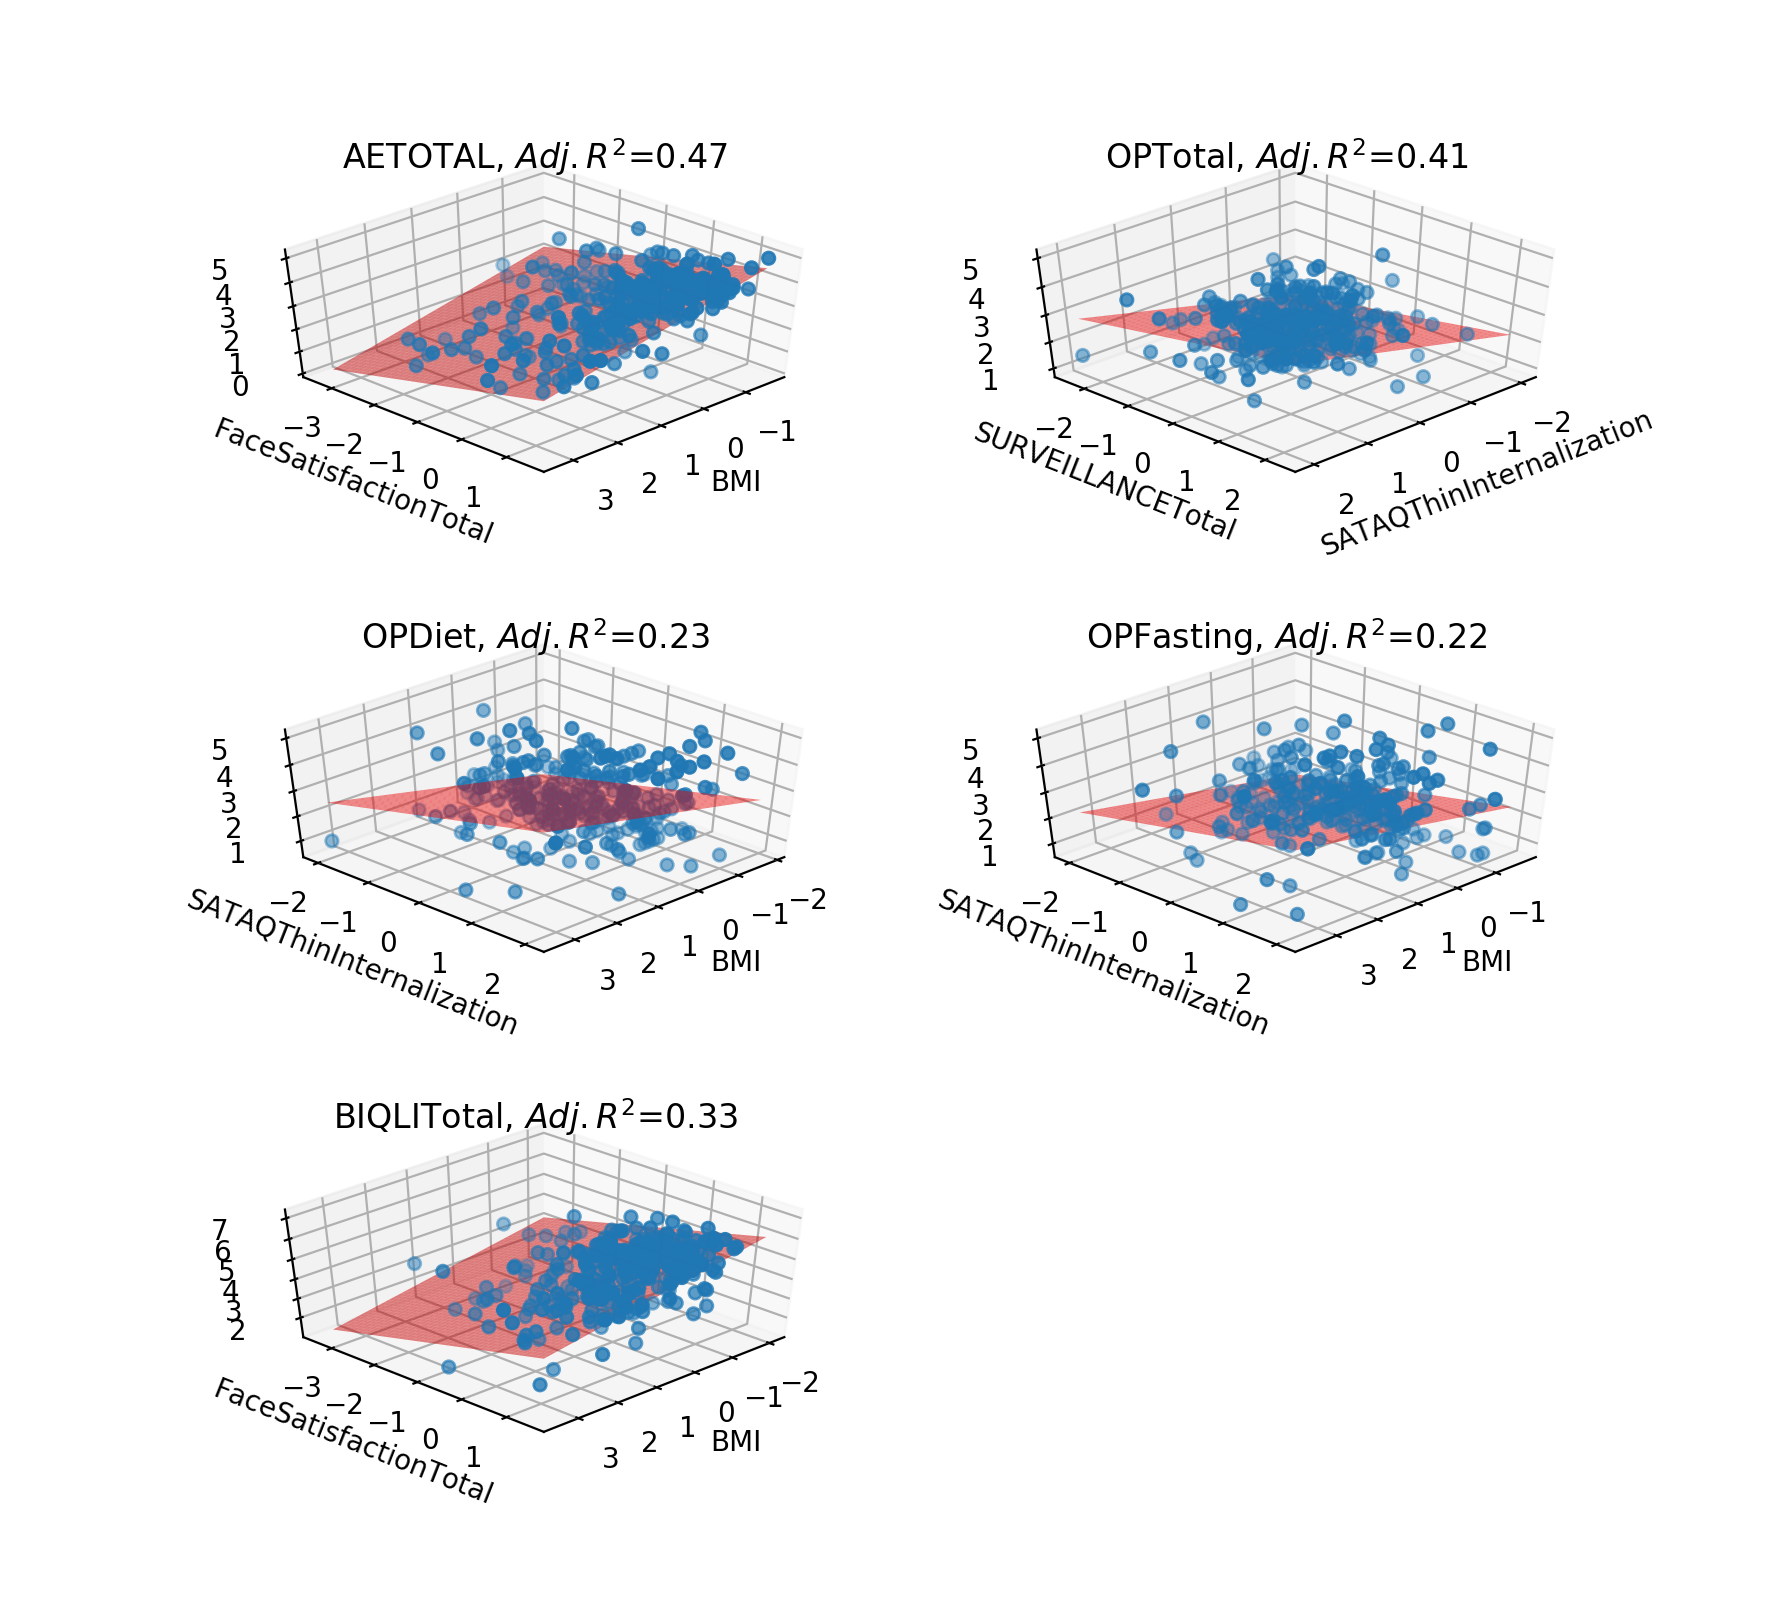

0        4.857143
1        2.000000
2        2.571429
3        2.857143
4        3.714286
           ...   
11615    1.571429
11616    1.000000
11617    3.142857
11618    3.714286
11619    1.285714
Name: AETOTAL, Length: 11620, dtype: float64


In [11]:
plt.rcParams["figure.figsize"] = (10,8)
subplot_index = (3,2)
figsize = plt.figaspect(0.9)
view = [45, 45]
construct_subplots(X, ys, subplot_index=subplot_index, figsize=figsize ,view=view)

## 2. Comparison between the variables with largest coefficients in Linear Regression and those with largest feature importance in Random Forest

In [391]:
import time
mod = print_report(c.num_demo + c.survey_data_aggregate, 'AETOTAL')
# 0, 8
t = time.time()
dependent_var = 'AETOTAL'
y = ys[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestRegressor(random_state=0, max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=500)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(importances)

elapsed = time.time() - t
print(elapsed)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1311.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:                -11646.
No. Observations:               11620   AIC:                         2.331e+04
Df Residuals:                   11609   BIC:                         2.340e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3755      0.007    -56.216      0.0

In [359]:
mod = print_report(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupationTotal')
# 3, 9
dependent_var = 'OverweightPreoccupationTotal'
y = ys[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=300)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(importances)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1360.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:29:14   Log-Likelihood:                -12162.
No. Observations:               11620   AIC:                         2.435e+04
Df Residuals:                   11609   BIC:                         2.443e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1775      0.007     25.423      0.0

In [360]:
mod = print_report(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupation3Diet')
# 0, 3
dependent_var = 'OverweightPreoccupation3Diet'
y = ys[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=300)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(importances)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     482.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:30:51   Log-Likelihood:                -17785.
No. Observations:               11620   AIC:                         3.559e+04
Df Residuals:                   11609   BIC:                         3.567e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2653      0.011     23.416      0.0

In [361]:
mod = print_report(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupation4TriedFasting')
# 0, 3
dependent_var = 'OverweightPreoccupation4TriedFasting'
y = ys[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=20, min_samples_split=20, n_estimators=100)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(importances)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     461.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:31:39   Log-Likelihood:                -15793.
No. Observations:               11620   AIC:                         3.161e+04
Df Residuals:                   11609   BIC:                         3.169e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1739      0.010     18.227      0.0

In [362]:
mod = print_report(c.num_demo + c.survey_data_aggregate, 'BIQLITotal')
# 0, 8
dependent_var = 'BIQLITotal'
y = ys[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print(importances)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     831.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:32:36   Log-Likelihood:                -15526.
No. Observations:               11620   AIC:                         3.107e+04
Df Residuals:                   11609   BIC:                         3.115e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2726      0.009    -29.224      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     22.57
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           7.51e-10
Time:                        11:48:04   Log-Likelihood:                -404.36
No. Observations:                 300   AIC:                             814.7
Df Residuals:                     297   BIC:                             825.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1729      0.062     -2.796      0.0

<IPython.core.display.Javascript object>


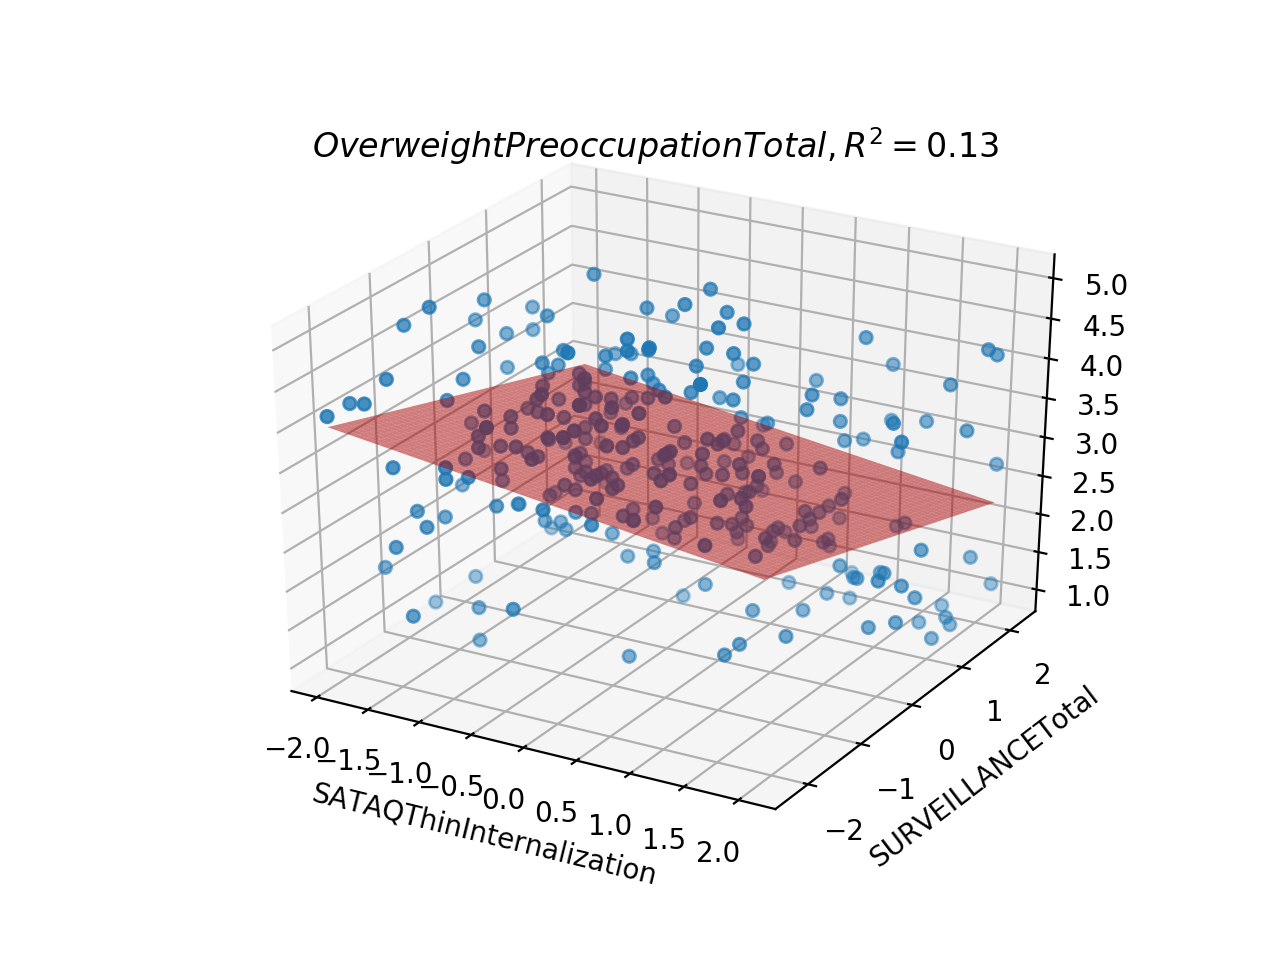

In [231]:
visualize_selected(3, 9, X, y, 'OverweightPreoccupationTotal', "SATAQThinInternalization", "SURVEILLANCETotal")
    

In [ ]:
visualize_selected(3, 9, X, y, 'OverweightPreoccupationTotal', "SATAQThinInternalization", "SURVEILLANCETotal")

In [131]:
X = data.loc[:, c.num_demo + c.survey_data_aggregate].values

scaler = StandardScaler()
scaler.fit(X)
X_t = scaler.transform(X)

y = data['AETOTAL'].values
mod = regression(y, X_t)
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1311.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:48:42   Log-Likelihood:                -11646.
No. Observations:               11620   AIC:                         2.331e+04
Df Residuals:                   11609   BIC:                         2.340e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3755      0.007    -56.216      0.0

In [134]:
y = data['AETOTAL'].values
mod = regression(y, X_t[:, [2, 6]])
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     448.9
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.58e-188
Time:                        17:53:14   Log-Likelihood:                -15605.
No. Observations:               11620   AIC:                         3.122e+04
Df Residuals:                   11617   BIC:                         3.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0609      0.009      7.087      0.0

In [135]:
y = data['AETOTAL'].values
mod = regression(y, X_t[:, [0, 8]])
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     5247.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:55:17   Log-Likelihood:                -12299.
No. Observations:               11620   AIC:                         2.460e+04
Df Residuals:                   11617   BIC:                         2.463e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4379      0.006    -67.583      0.0

<IPython.core.display.Javascript object>


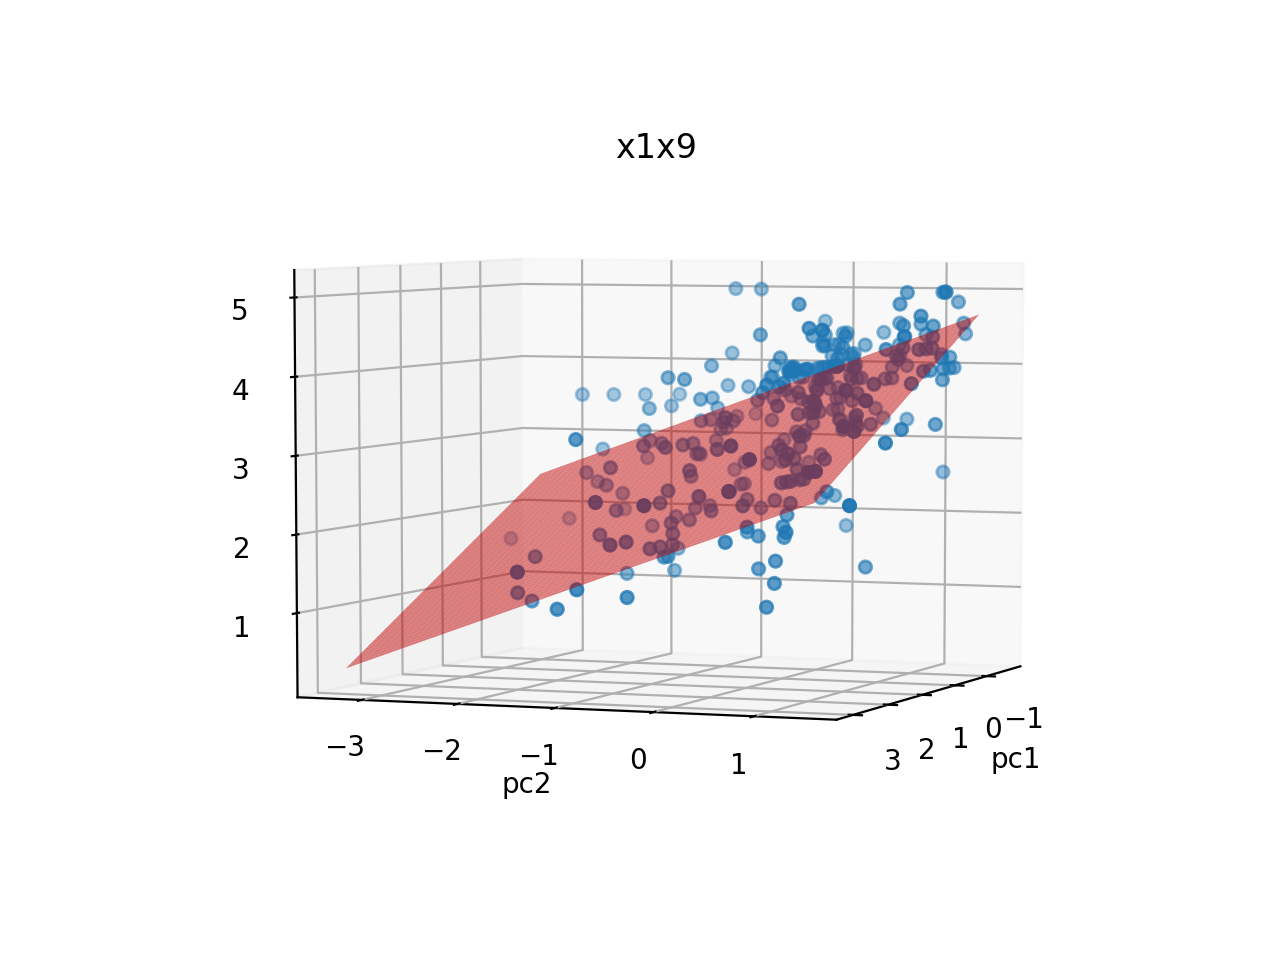

In [138]:
idx = np.random.choice([x for x in range(len(X_t))], size=300, replace=False, p=None)
X_sampled = X_t[idx, :]
y_sampled = y[idx]
plot_3d(X_sampled[:, [0, 8]], y_sampled, 'x1x9', mod)

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

forest = RandomForestRegressor(random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

/Users/Work/opt/anaconda3/envs/g/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
importances

array([0.31840173, 0.06034659, 0.02163365, 0.06658967, 0.06824123,
       0.04125371, 0.03240216, 0.04419027, 0.26217816, 0.08476285])

In [154]:
forest.score(X_train, y_train)

0.9113430907302021

In [153]:
forest.score(X_test, y_test)

0.5184054224329743

running for: AETOTAL
variance explained: 
[0.27010253 0.14361091]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2996.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:                -13622.
No. Observations:               11620   AIC:                         2.725e+04
Df Residuals:                   11617   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

<IPython.core.display.Javascript object>


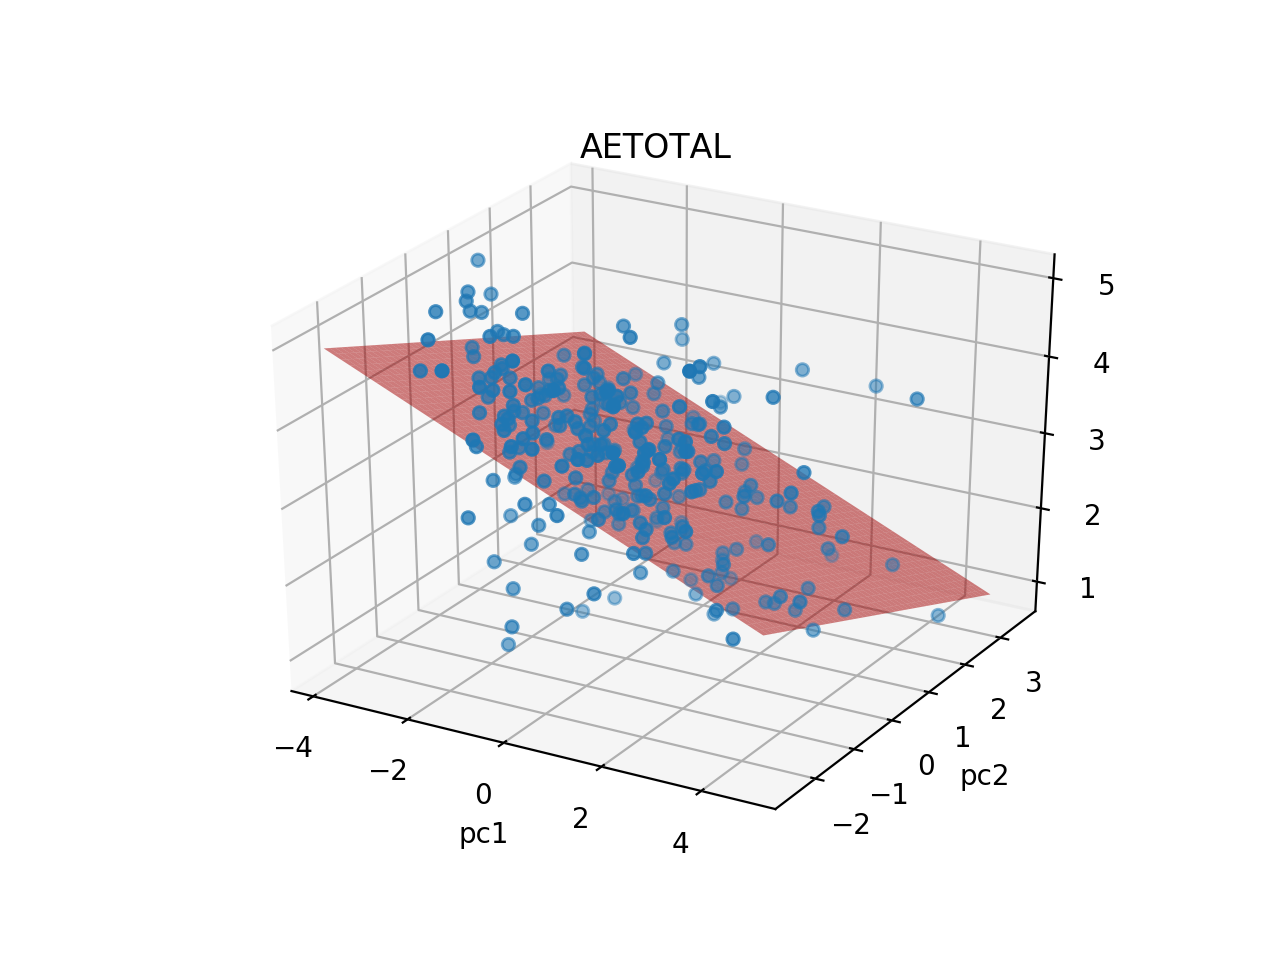

running for: OverweightPreoccupationTotal
variance explained: 
[0.27010253 0.14361091]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     4896.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:                -13115.
No. Observations:               11620   AIC:                         2.624e+04
Df Residuals:                   11617   BIC:                         2.626e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

<IPython.core.display.Javascript object>


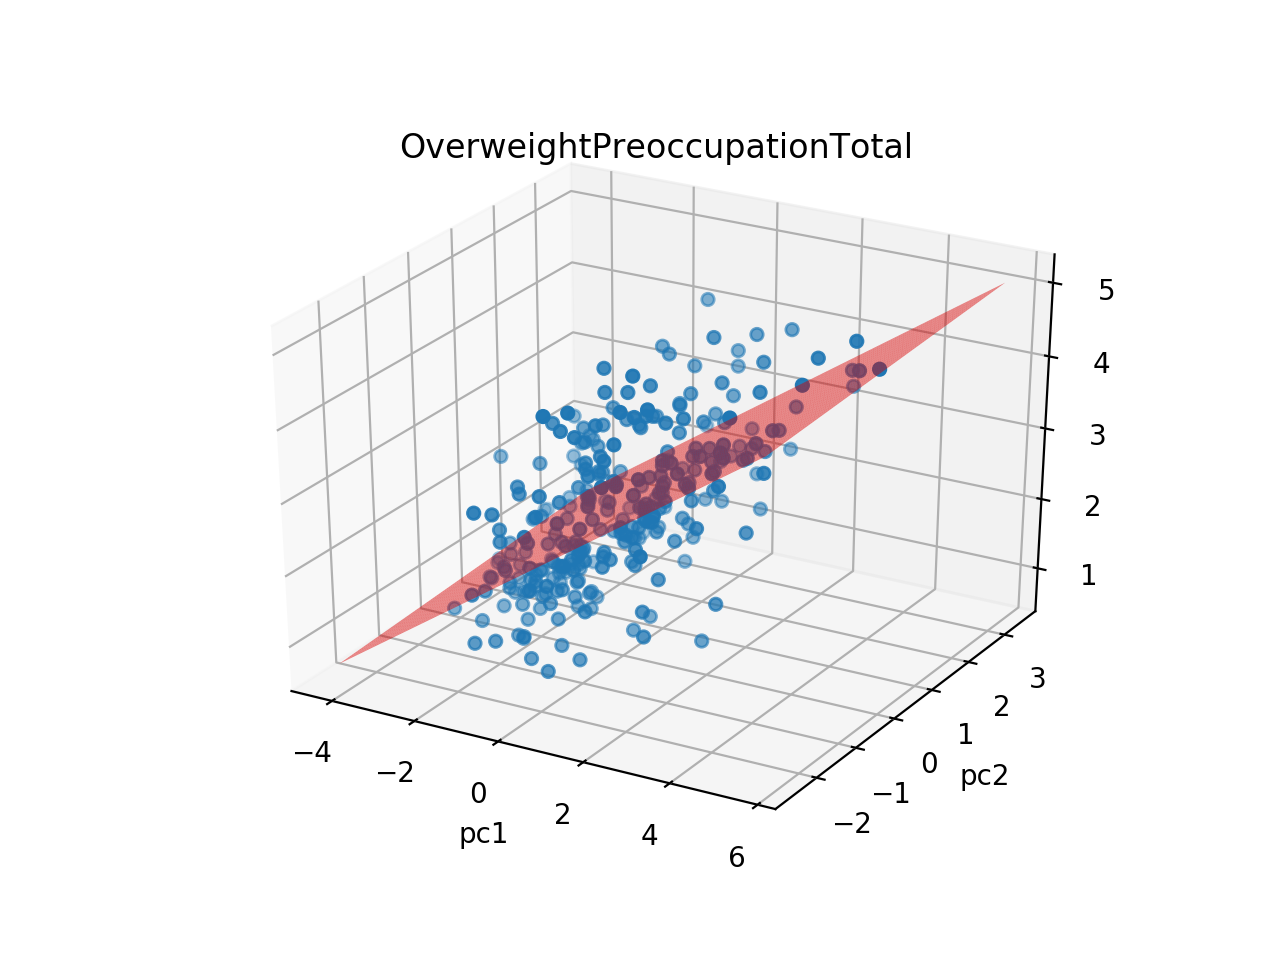

running for: OverweightPreoccupation3Diet
variance explained: 
[0.27010253 0.14361091]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     1881.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:41   Log-Likelihood:                -18174.
No. Observations:               11620   AIC:                         3.635e+04
Df Residuals:                   11617   BIC:                         3.638e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

<IPython.core.display.Javascript object>


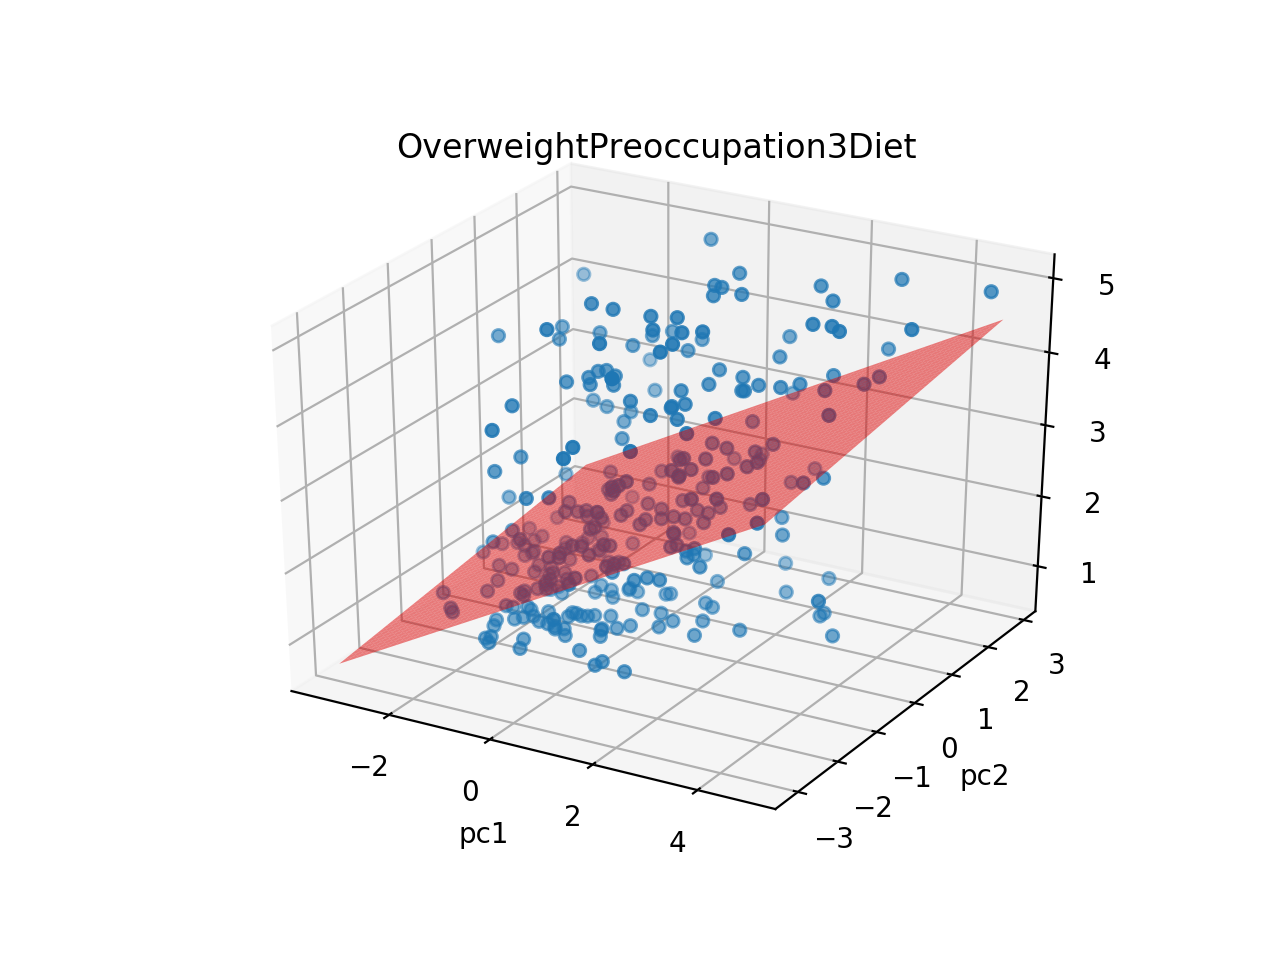

running for: OverweightPreoccupation4TriedFasting
variance explained: 
[0.27010253 0.14361091]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2045.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:41   Log-Likelihood:                -15983.
No. Observations:               11620   AIC:                         3.197e+04
Df Residuals:                   11617   BIC:                         3.199e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<IPython.core.display.Javascript object>


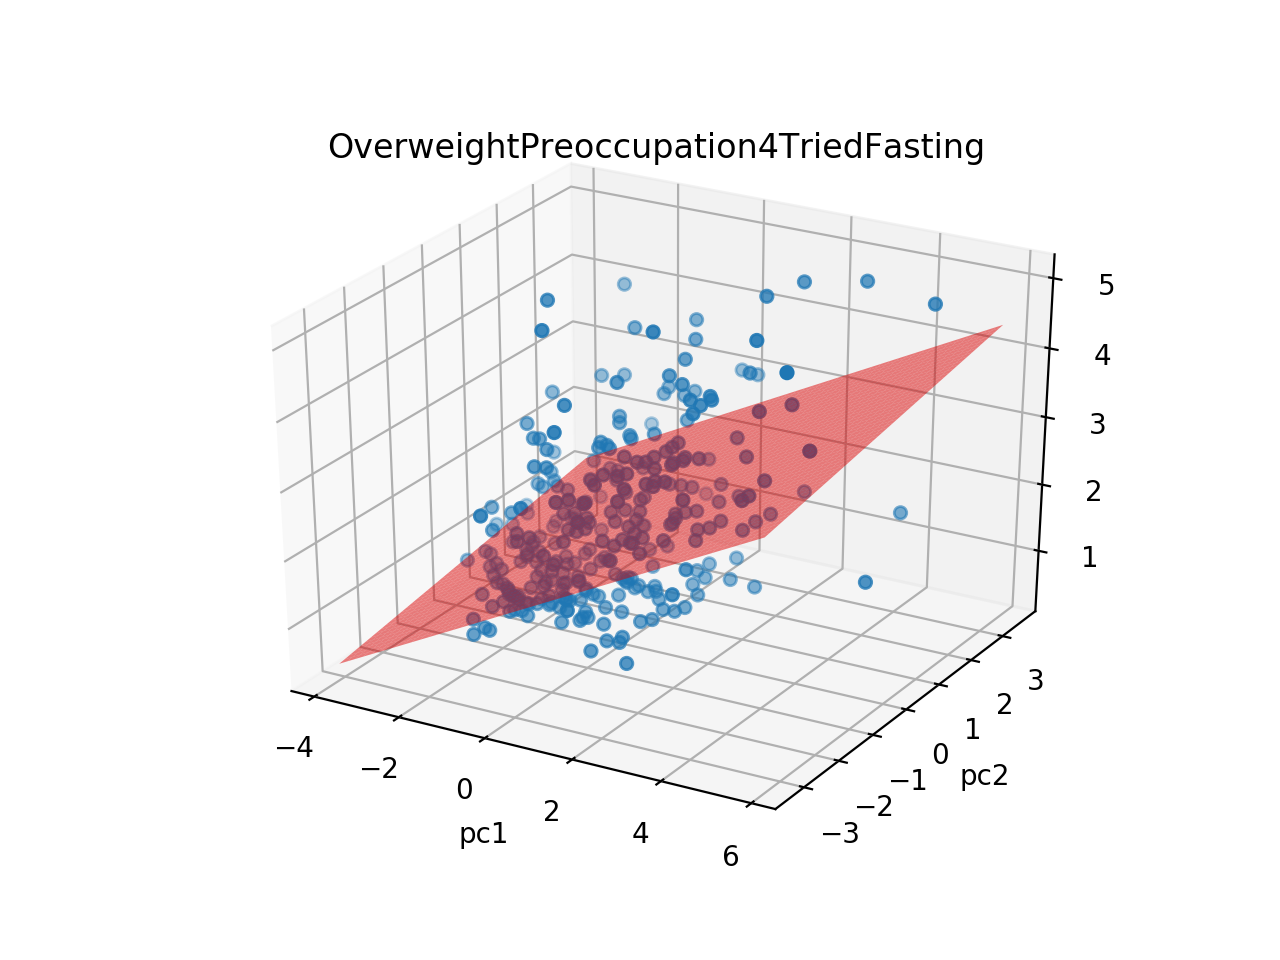

running for: BIQLITotal
variance explained: 
[0.27010253 0.14361091]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1830.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:14:41   Log-Likelihood:                -17071.
No. Observations:               11620   AIC:                         3.415e+04
Df Residuals:                   11617   BIC:                         3.417e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

<IPython.core.display.Javascript object>


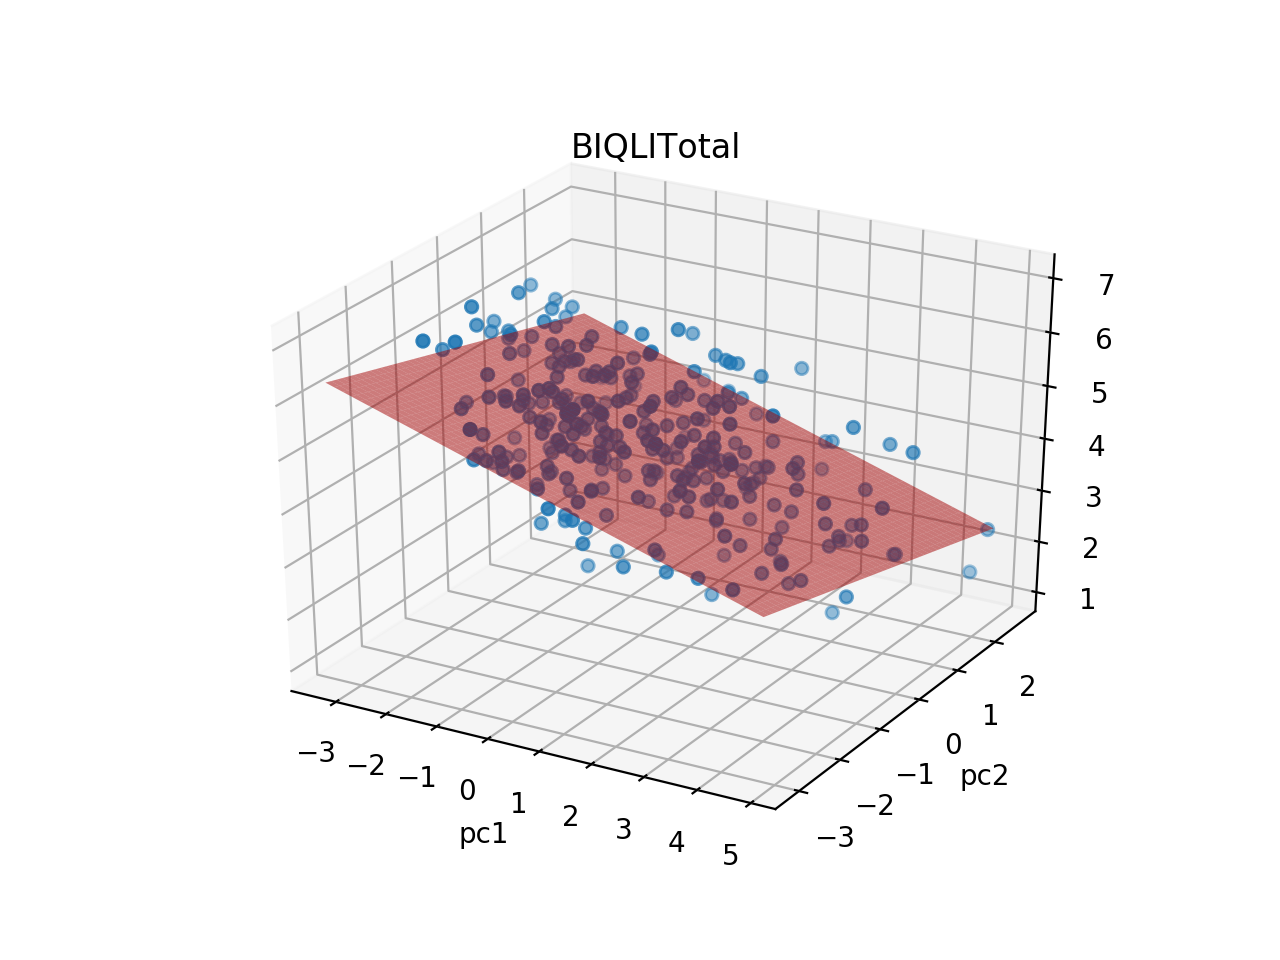

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [148]:
pca = main(c.num_demo + c.survey_data_aggregate, 'AETOTAL')
main(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupationTotal')
main(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupation3Diet')
main(c.num_demo + c.survey_data_aggregate, 'OverweightPreoccupation4TriedFasting')
main(c.num_demo + c.survey_data_aggregate, 'BIQLITotal')




In [35]:
y = data['AETOTAL'].values
mod = regression(y, X_t)

idx = np.random.choice([x for x in range(len(X_t))], size=300, replace=False, p=None)
X_sampled = X_t[idx, :]
y_sampled = y[idx]

plot_3d(X_sampled, y_sampled)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     1841.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:30:01   Log-Likelihood:                -14438.
No. Observations:               11620   AIC:                         2.888e+04
Df Residuals:                   11617   BIC:                         2.890e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0110      0.001    -15.300      0.0

In [150]:
pca.components_

array([[ 0.21069903, -0.15382513,  0.00389773,  0.40435664,  0.15860522,
         0.42971355,  0.44644288,  0.39740561, -0.24413143,  0.37652662],
       [ 0.53428172,  0.46050781, -0.09971373, -0.25036233, -0.52462384,
         0.25338016,  0.13538721,  0.13861529, -0.02020952, -0.22905782]])